<a href="https://colab.research.google.com/github/VishnuvikasS/True-and-Fake-News-Prediction/blob/main/Fake_news_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# True and Fake News Prediction

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.


In [77]:
Test=pd.read_csv('/content/drive/MyDrive/true and fake news prediction/test (8).csv')
##import necessary libraries and load dataset

In [79]:
Train=pd.read_csv('/content/drive/MyDrive/true and fake news prediction/train (3).csv')
##import necessary libraries and load dataset


# Data Structure and Content

In [80]:
Train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set


(20800, 5)

In [81]:
Test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.


(5200, 4)

In [82]:
Train.info()
#display the information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [83]:
Train.isnull().sum()
#display number of missing values of each column

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [84]:
Train.describe()
#display descriptive statistics


,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [85]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Preprocessing

1.Removing the null values

In [86]:
Train=Train.fillna(' ')
#Replace the missing values in the Train dataset with a space (' ')


In [87]:
Test=Test.fillna(' ')
#Replace the missing values in the Test dataset with a space (' ')


In [88]:
Train.isnull().sum()
#display number of missing values of each column

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [89]:
Test.info()
#display information about the datasets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [90]:
Test.isnull().sum()
#display number of missing values of each column


id        0
title     0
author    0
text      0
dtype: int64

In [91]:
Test.describe()
#display descriptive statistics

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [92]:
Test.head()
#display first few rows of the datasets

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [93]:
Train['subject']=Train['author']+Train['title']
# Create a new column 'subject' by concatenating the 'author' and 'title' columns with a space in between


In [94]:
Train.head()
#display first few rows of the datasets



,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [95]:
Test.head()
#display first few rows of the datasets

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#Tokenization

In [96]:
import nltk
nltk.download('punkt')
# Download the Punkt tokenizer models for tokenization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
from nltk.tokenize import word_tokenize
Train['tokens']=Train['subject'].apply(word_tokenize)
# Tokenize the 'subject' column and create a new column 'tokens'

In [98]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


3.Lowercasing the text

In [99]:
Train['subject']=Train['subject'].str.lower()
# Convert all text in the 'subject' column to lowercase

In [100]:
Train.head()
#display first few rows of the datasets


,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


4.Removal of punctuation

In [101]:
Train['subject']=Train['subject'].str.replace('[^\w\s]',' ')
# Remove all punctuation marks from the 'subject' column

In [102]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


5.Removal of stop words

In [103]:
nltk.download('stopwords')
# Download the stopwords corpus for removing stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
sw=set(nltk.corpus.stopwords.words('english'))
print(sw)
# Create a set of English stopwords and print it

{'few', 'for', "you're", 'why', 'do', 'down', 'the', 'both', 'ma', 'doing', 'some', 'before', 'or', 'ours', 'above', 'be', 'this', 'their', 'from', 'wasn', 'when', 'himself', "didn't", 'other', 'to', 'who', 'than', 'herself', 'doesn', "hasn't", 'o', "haven't", 'isn', 'but', "she's", 'against', 'where', 't', 'more', 'too', 've', 'under', 'its', 'now', 'yourselves', 'by', 'such', "hadn't", "that'll", 'itself', 'once', "you've", 'what', 'have', 'a', 'mightn', "weren't", 'own', 'won', 'until', 'again', "needn't", 'below', 'your', "don't", 'haven', 'those', 'most', 'no', 'y', 'them', 'are', 'it', 'ain', 'hers', 'not', 'she', 're', 'his', 'all', 'in', 'needn', 'yourself', 'yours', 'aren', "wasn't", 'an', 'shouldn', 'out', 'shan', 'during', "you'd", 'm', "doesn't", 'i', 'weren', 'couldn', 'ourselves', 'and', 'her', 'll', 'up', 'we', 'has', "should've", 'just', "isn't", 'as', 'that', 'because', "mustn't", 'themselves', 'd', 'after', 'on', 'did', 'my', 'having', 'of', 'off', 'mustn', 'hadn', 'h

In [105]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [106]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: didn’t even see c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy truth might get fired,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed single us a...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


6.stemming or lammatization

In [107]:
from nltk.stem import PorterStemmer
# Import the PorterStemmer class for stemming

In [108]:
Stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :        stemmer = PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([Stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms


In [109]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucushous dem aide: didn’t even see com...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillari clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhi truth might get fire,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilian kill singl us airst...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jail fiction unpub...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# Vectorisation

In [110]:
x=Train['subject']
y=Train['label']
# Assign the 'subject' column to variable x (features) and the 'label' column to variable y (target)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the TfidfVectorizer class for vectorizing text data

In [112]:
Vt=TfidfVectorizer()
Vt.fit(x)
# Fit the TfidfVectorizer on the 'subject' column of the Train dataset

TfidfVectorizer()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [113]:
x.head()
#display first few rows of the datasets

0    darrel lucushous dem aide: didn’t even see com...
1    daniel j. flynnflynn: hillari clinton, big wom...
2           consortiumnews.comwhi truth might get fire
3    jessica purkiss15 civilian kill singl us airst...
4    howard portnoyiranian woman jail fiction unpub...
Name: subject, dtype: object

In [114]:
x=Vt.transform(x)
# Transform the 'subject' column of the Train dataset using the fitted TfidfVectorizer

In [115]:
print(x)
# Print the transformed data


  (0, 30011)	0.2702317405535354
  (0, 25953)	0.23633175774140575
  (0, 17287)	0.39616172821890755
  (0, 16772)	0.2687730240968852
  (0, 14864)	0.2267902704938032
  (0, 9503)	0.2131010345817379
  (0, 7770)	0.2725285388588018
  (0, 7469)	0.26535031144709154
  (0, 7127)	0.3269077189450684
  (0, 5991)	0.22776883917952795
  (0, 5117)	0.3339547020931297
  (0, 1090)	0.36074580999296135
  (1, 31859)	0.36688013213305515
  (1, 13172)	0.2508638367430399
  (1, 10395)	0.5226747357728401
  (1, 7068)	0.31638169487081524
  (1, 5725)	0.23248708292981804
  (1, 4720)	0.464055696418436
  (1, 4070)	0.18539331285820687
  (1, 3346)	0.35413476846519715
  (2, 29899)	0.36635739112785753
  (2, 18743)	0.4315491786494108
  (2, 11172)	0.3064339824029749
  (2, 10169)	0.3472323577842834
  (2, 6291)	0.404084133229652
  :	:
  (20797, 28830)	0.3162590151970751
  (20797, 25250)	0.2481398859255049
  (20797, 23768)	0.2719892730679363
  (20797, 23448)	0.24910787789148428
  (20797, 20003)	0.08061747005948777
  (20797, 18695)

In [116]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [117]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [118]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
# Split the data into training and testing sets


In [119]:
Model=LogisticRegression()
# Create a Logistic Regression model


In [120]:
Model.fit(xTrain,yTrain)
# Fit the Logistic Regression model on the training data

LogisticRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [121]:
ytrpredict=Model.predict(xTrain)
# Make predictions on the training data using the trained Logistic Regression model


In [122]:
accuracy=accuracy_score(yTrain,ytrpredict)
precision=precision_score(yTrain,ytrpredict)
recall=recall_score(yTrain,ytrpredict)
f1=f1_score(yTrain,ytrpredict)

print('Training Accuracy:',accuracy)
print('Training Precision:',precision)
print('Training Recall:',recall)
print('Training F1 Score:',f1)

Training Accuracy: 0.971875
Training Precision: 0.9519429753966429
Training Recall: 0.9939975990396158
Training F1 Score: 0.9725158562367864


In [123]:

accuracy =accuracy_score(yTrain,ytrpredict)
precision = precision_score(yTrain, ytrpredict)
recall = recall_score(yTrain, ytrpredict)
f1 = f1_score(yTrain, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:',f1)

 Training Accuracy: 0.971875
 Training Precision: 0.9519429753966429
 Training Recall: 0.9939975990396158
Training F1 Score: 0.9725158562367864


In [124]:
Yttpredict=Model.predict(xTest)
# Make predictions on the testing data using the trained Logistic Regression model


In [125]:
accuracy =accuracy_score(yTest,Yttpredict)
precision = precision_score(yTest, Yttpredict)
recall = recall_score(yTest, Yttpredict)
f1 = f1_score(yTest, Yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:',f1)

 Testing Accuracy: 0.9504807692307692
 Testing Precision: 0.9180400890868596
 Testing Recall: 0.9894383101296207
Testing F1 Score: 0.9524029574861367


In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Import necessary libraries for confusion matrix



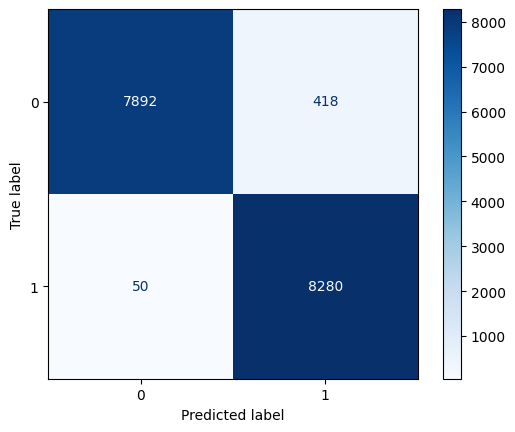

In [127]:
# Generate the confusion matrix
cm = confusion_matrix(yTrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

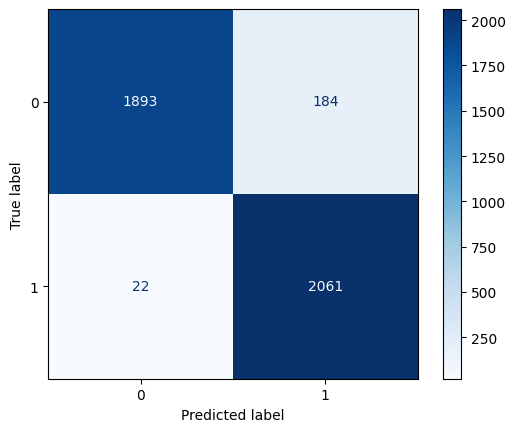

In [128]:
# Generate the confusion matrix
cm = confusion_matrix(yTest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

# Saving the Model

In [129]:
import pickle
# Import the pickle module for serializing and deserializing Python object


SUMMARY:

*In this project true and fake prediction ,we started with mounding thr datasets from the drive and imported the required libraries for the project.

*Then we used the explored the train and tset datasets by using numpy and pandas libraries. *Then we checked for the null values using a library called isnull().

*We used shape library to identify how many rows and columns are there in a dataset.

*Removed null values from the dataset using fillna().

*Tokenizing the 'subject'column in train and test dataset and storing the result in a new 'token' column.

*Lowered the cases for 'subject' column in train dataset.

*Removed the punctuations and stopwords from the 'subject' coulomn.

*We did stemming,lammatization and vectorization.

*In conclusion we saved the model using pickle library.